# DOPPIA FENDITURA

Nel nostro caso lo schermo misurava l'ampiezza del campo elettrico su una superficie __circolare__

TODO: misure fenditura e posizione dei componenti
- $\sigma_V$ = oscillazione strumento
- $\sigma_\theta$ = 1°

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import jax.numpy as jnp
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'fenditura2.csv'
fr = pd.read_csv(FILE)

In [2]:
θ = (np.array(fr['angolo (°)']) - 90) * np.pi/180
sigmaθ = np.ones_like(θ) * np.pi/180
V = np.array(fr['V (mV)']) * 10**-3
sigmaV = np.array(fr['sigmaV (mV)']) * 10**-3

## FENDITURE DI YOUNG

il campo elettrico (che per una singola fenditura centrata nell'origine sarabbe costante lungo tutto lo schermo) presenta un'andamento sinusoidale.

L'ampiezza dei picchi sarebbe uguale a tutti gli angoli se lo schermo fosse piatto, visto che il nostro schermo è sferico osserviamo un'andamento di tipo coseno


__NOTA:__ osserviamo solo il fenomeno di interferenza fra le due onde, la diffrazione non si nota perchè è funzione dell'intensità dell'onda non dell'ampiezza del campo elettrico


__FUNZIONE FENDITURA__

$E_{tot} = E_1 + E_2$ per il principio di sovrapposizione. Per ragioni di _simmetria_ l'unica componente a non cancellarsi del campo elettrico è quella lungo la direzione di propagazione, la figura di interferenza attesa su uno __schermo piatto__ è del tipo $V(\theta) = |A\cdot \cos(B\theta)|$.\

$V(\theta) = |A\cos^2(\theta) \cdot \cos(B\theta)|$

In [3]:
def funzione_couscous(θ,A,B):
    return jnp.abs(A*(jnp.cos(θ)**2) *jnp.cos(B*θ))

fit_couscous = Interpolazione(θ,V,sigmaθ,sigmaV,funzione_couscous,[0.288,7.55],names=['A','B'])
display(fit_couscous.m)
print(fit_couscous)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 141.3                      │              Nfcn = 39               │
│ EDM = 5.51e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.332   │   0.007   │            │            │         │         │       │
│ 1 │ B    │   7.60    │   0.04    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        A        B │
├───┼───────────────────┤
│ A │ 4.71e-05        0 │
│ B │        0  0.00187 │
└───┴───────────────────┘

----------------- VALORI FIT: -----------------
A: (3.322 ± 0.069)e-1 
B: 7.599 ± 0.043 

dof: 27
chi2: 141.32
chi2 ridotto: 5.23
pvalue: 0.0
------------------------------------------------



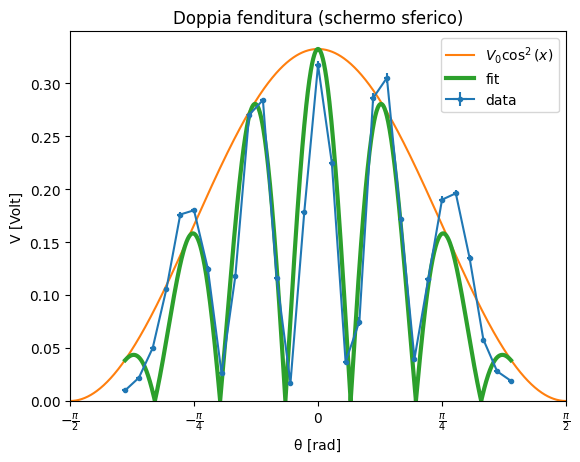

In [4]:
plt.errorbar(θ,V,yerr=sigmaV,xerr=sigmaθ,fmt='.-',label='data')

x = np.linspace(-np.pi/2,np.pi/2,1000)
y =( np.cos(x)**2) *fit_couscous.values['A']

plt.plot(x,y, label='$V_0 \\cos^2(x)$')
plt.plot(*fit_couscous.draw(),label='fit',linewidth=3)

plt.ylim(0)
plt.xlim(-np.pi/2,np.pi/2)
plt.ylabel('V [Volt]')
plt.xlabel('θ [rad]')
plt.title('Doppia fenditura (schermo sferico)')
plt.xticks([-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2],[r'$-\frac{\pi}{2}$',r'$-\frac{\pi}{4}$',r'$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$'])
plt.legend()
plt.show()

### CONSIDERAZIONI:

Il fit è qualitativamente attedibile

Nelle code la stima è meno efficiente, la causa può essere il modello rudimentale che trascura la dipendenza $\frac{1}{r}$